### Import all Model Classes and PreProcess the Data

In [2]:
import SL_API as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
imp.reload(pre)
X_test, y_test, X_train_split, y_train_split, X_valid, y_valid, X_train, y_train = pre.PreProcessData()
modelAnalyzer = pre.ModelAnalysis()

### Definition of Terms

Accuracy: How likely is a choice that the model makes correct?

F1 Score: Averages precision and recall scores.

Precision: How likely is a positive choice that the model makes correct?

NPV: How likely is a negative choice that the model makes incorrect?

Recall: The ratio between the models positive choice and all true positive choices.

Specificity: The ratio between the models negative choice and all true negative choices.

Yoden Index: The optimal ratio between recall and specificity to place a threshold (recall + specificity - 1)

### Construct of Best Logistic Regression Model

In [3]:
modelTest = pre.LogisticRegression(learning_rate=0.02, num_iterations=1390)
modelTest.fit(X_train_split, y_train_split)

Accuracy: 0.7400940228341168
F1 Score: 0.814388489208633
Precision: 0.7493380406001765
NPV: 0.7106741573033708
Recall: 0.8918067226890757
Specificity: 0.47113594040968343


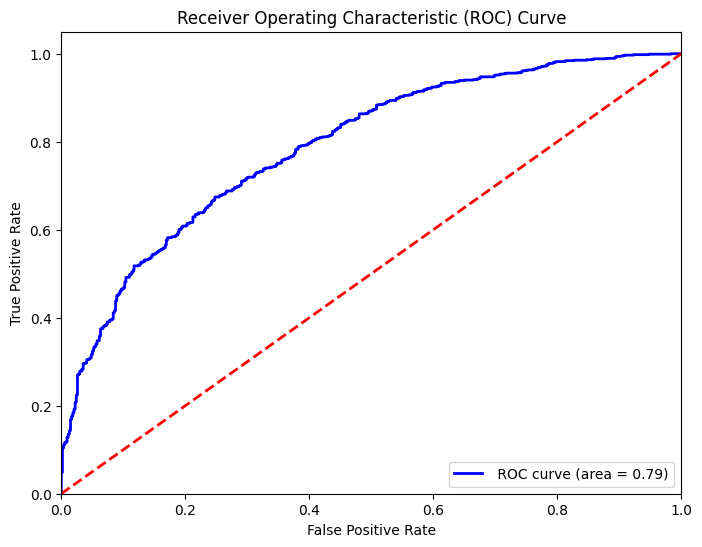

In [4]:
y_predTest = modelTest.predict(X_test)
modelAnalyzer.printPrediction(y_predTest, y_test)
modelAnalyzer.plot_roc_auc(y_predTest, y_test)

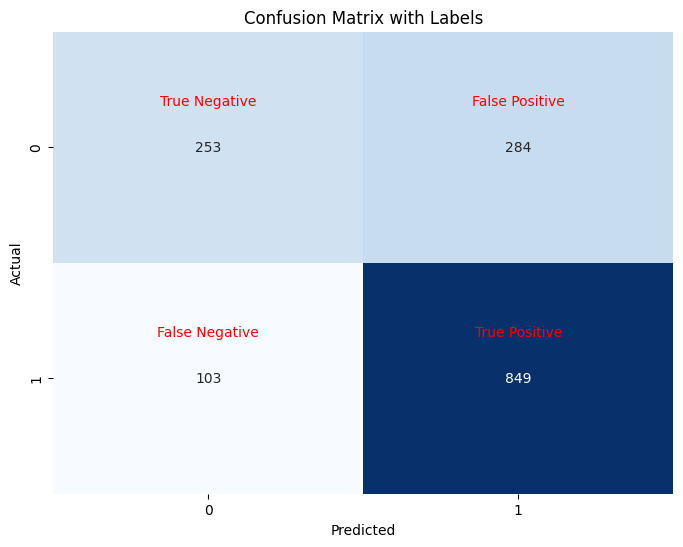

In [5]:
modelAnalyzer.plot(y_predTest, y_test)

### Construct of Best Neural Network Model

In [6]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005Test = pre.NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005Test.train(np.array(X_train_split), np.array(y_train_split), epochs)
predictions0005Test = np.array(model0005Test.predict(X_test))

Epoch 100, Loss: 0.4938
Epoch 200, Loss: 0.4721
Epoch 300, Loss: 0.4647
Epoch 400, Loss: 0.4619
Epoch 500, Loss: 0.4610
Epoch 600, Loss: 0.4608
Epoch 700, Loss: 0.4611
Epoch 800, Loss: 0.4613
Epoch 900, Loss: 0.4618
Epoch 1000, Loss: 0.4624


Accuracy: 0.7374076561450638
F1 Score: 0.8093612871769867
Precision: 0.7552320291173794
NPV: 0.6871794871794872
Recall: 0.8718487394957983
Specificity: 0.49906890130353815


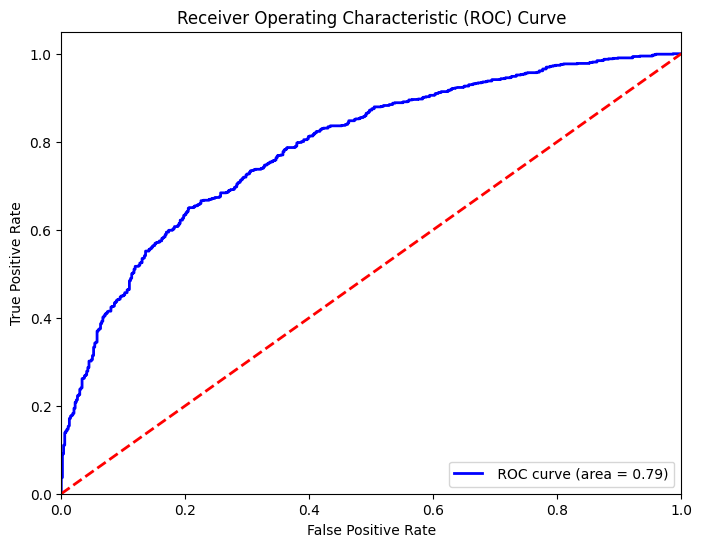

In [7]:
modelAnalyzer.printPrediction(predictions0005Test, y_test)
modelAnalyzer.plot_roc_auc(predictions0005Test, y_test)

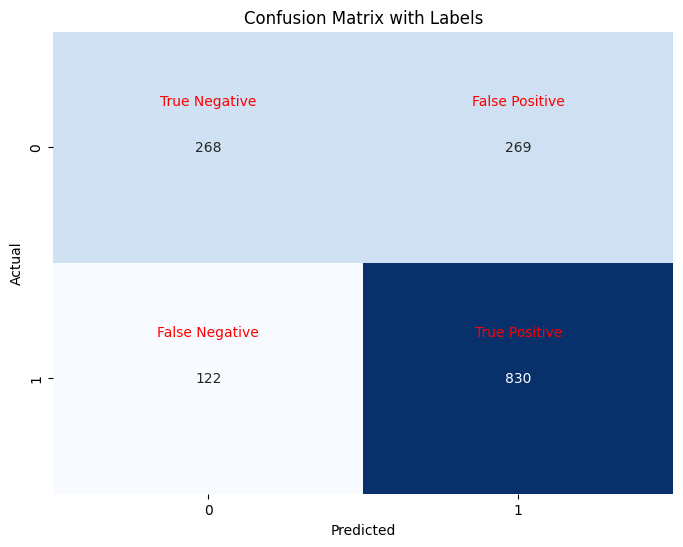

In [8]:
modelAnalyzer.plot(predictions0005Test, y_test)

### Construct of Best Decision Tree Model

In [9]:
tree8Test = pre.DecisionTree(max_depth=8)
tree8Test.fit(np.array(X_train_split), np.array(y_train_split))
predictions8Test = tree8Test.predict(np.array(X_test))

Accuracy: 0.7011417058428475
F1 Score: 0.7849202513291444
Precision: 0.7269471799462847
NPV: 0.6236559139784946
Recall: 0.8529411764705882
Specificity: 0.43202979515828677


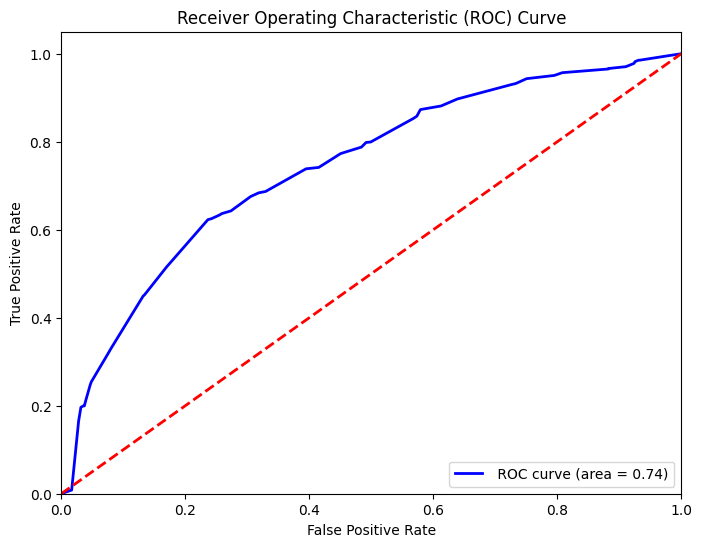

In [10]:
modelAnalyzer.printPrediction(predictions8Test, y_test)
modelAnalyzer.plot_roc_auc(predictions8Test, y_test)

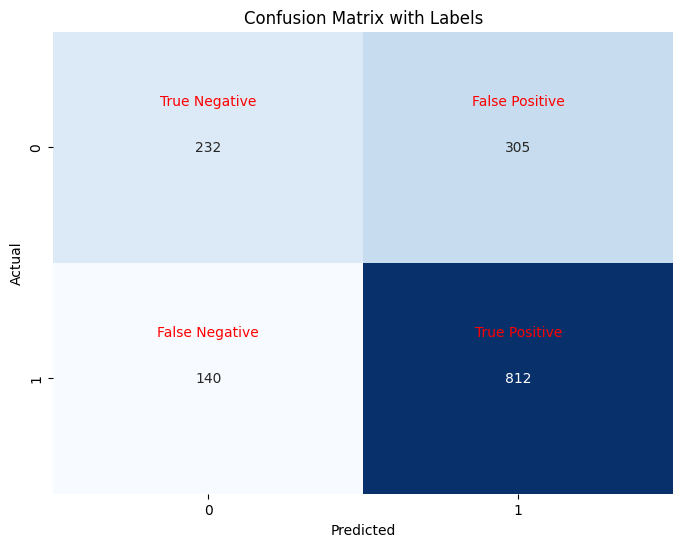

In [11]:
modelAnalyzer.plot(predictions8Test, y_test)

### Construct of Best Random Forest Model

In [20]:
forest98Test = pre.RandomForest(n_estimators=9, max_depth=8)
forest98Test.fit(np.array(X_train_split), np.array(y_train_split))
predictions98Test = forest98Test.predict(np.array(X_test))

Accuracy: 0.7192746809939556
F1 Score: 0.7976766698935142
Precision: 0.7396768402154399
NPV: 0.6586666666666666
Recall: 0.865546218487395
Specificity: 0.45996275605214154


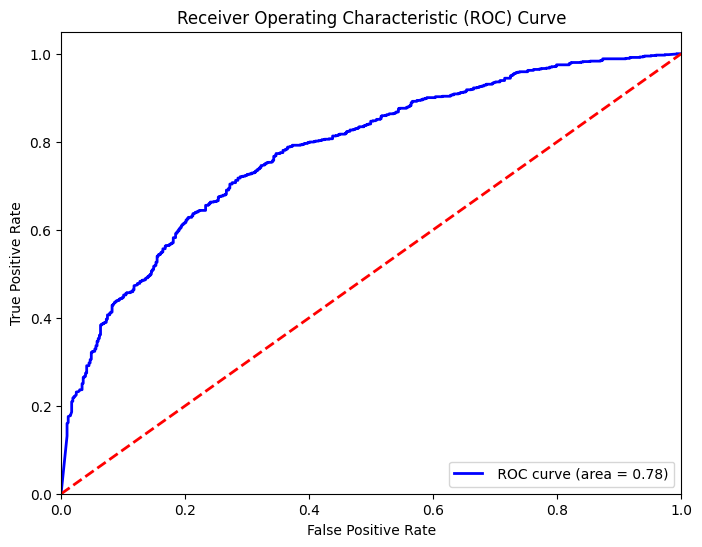

In [21]:
modelAnalyzer.printPrediction(predictions98Test, y_test)
modelAnalyzer.plot_roc_auc(predictions98Test, y_test)

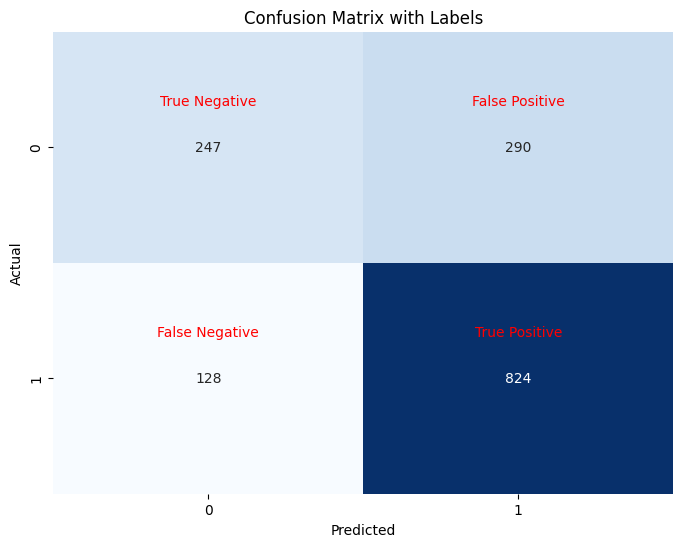

In [22]:
modelAnalyzer.plot(predictions98Test, y_test)

### Compare Models Visually With ROC

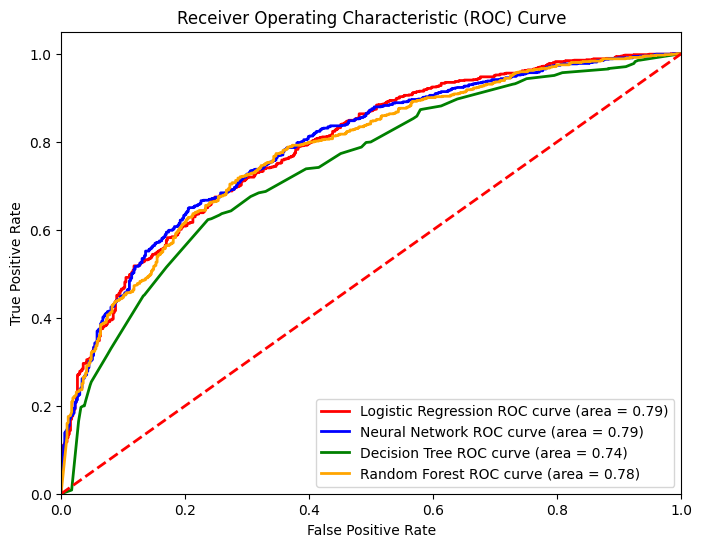

In [32]:
plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_test, y_predTest)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red', lw=2, label='{} ROC curve (area = %0.2f)'.format("Logistic Regression") % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions0005Test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='{} ROC curve (area = %0.2f)'.format("Neural Network") % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions8Test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green', lw=2, label='{} ROC curve (area = %0.2f)'.format("Decision Tree") % roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, predictions98Test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label='{} ROC curve (area = %0.2f)'.format("Random Forest") % roc_auc)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Comparison Analysis
In terms of their AUC score, The order is as follows: Logistic Regression/Neural Networks, Random Forest, Decision Trees.

In terms of their Accuracy, The order is as follows: Logistic Regression, Neural Networks, Random Forest, Decision Trees.

In terms of their F1 Score, The order is as follows: Logistic Regression, Neural Networks, Random Forest, Decision Trees.

In terms of their Precision, The order is as follows: Neural Networks, Logistic Regression, Random Forest, Decision Trees.

In terms of their Recall, The order is as follows: Logistic Regression, Neural Networks, Random Forest, Decision Trees.

Overall It seems extremely Consistant that the order of which model is better from best to worst is as follows:
1) Logistic Regression
2) Neural Networks
3) Random Forest
4) Decision Trees